In [1]:
import numpy as np
import lbg_forecast.population_model as pop
import lbg_forecast.priors_mass_func as pr
import matplotlib.pyplot as plt
import scipy as sc
import prospect.models.transforms as ts
import lbg_forecast.sfh as sfh

In [2]:
def plot_corr(correlations, title):
    fig = plt.figure(figsize=(10,10))

    plt.matshow(correlations, fignum=fig)

    for (i, j), z in np.ndenumerate(correlations):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20)

    plt.title(title)
    plt.colorbar()
    plt.show()

def get_sfrs_in_bins(logm, logsfrratios, agebins):
    sfrs = []

    i = 0
    while(i < logm.shape[0]):
        sfrs.append(ts.logsfr_ratios_to_sfrs(logm[i], logsfrratios[i, :], agebins))
        i+=1

    sfrs = np.array(sfrs)
    return sfrs


In [3]:
#run = 'hpc120'
#real = 0
#ngals = 10000
#spsp = np.load("sps_parameter_samples/sps_"+run+".npy")[real, :ngals, :]
#spsp.shape

In [23]:
run = 'hpc120'
loaded_sps_parameters = np.load("sps_parameter_samples/sps_"+run+".npy")
loaded_photometry = np.load("photo_samples/photo_"+run+".npy")
total_spsp = []
total_phot = []
ngals = 20000
reals = 120
for real in range(reals):
    total_spsp.append(loaded_sps_parameters[real, :ngals, :])
    total_phot.append(loaded_photometry[real, :ngals, :])

In [24]:
band = 2
band_cut = 999

total_spsp = np.reshape(np.array(total_spsp), (reals*ngals, loaded_sps_parameters.shape[2]))
total_phot = np.reshape(np.array(total_phot), (reals*ngals, loaded_photometry.shape[2]))

total_spsp = total_spsp[np.where(total_phot[:, band] < band_cut)[0], :]
total_spsp.shape

(2400000, 17)

In [25]:
logsfrs = total_spsp[:, 10:-1]
logmass = np.log10(total_spsp[:, -1])

sfrs = get_sfrs_in_bins(logmass, logsfrs, sfh.default_agebins())


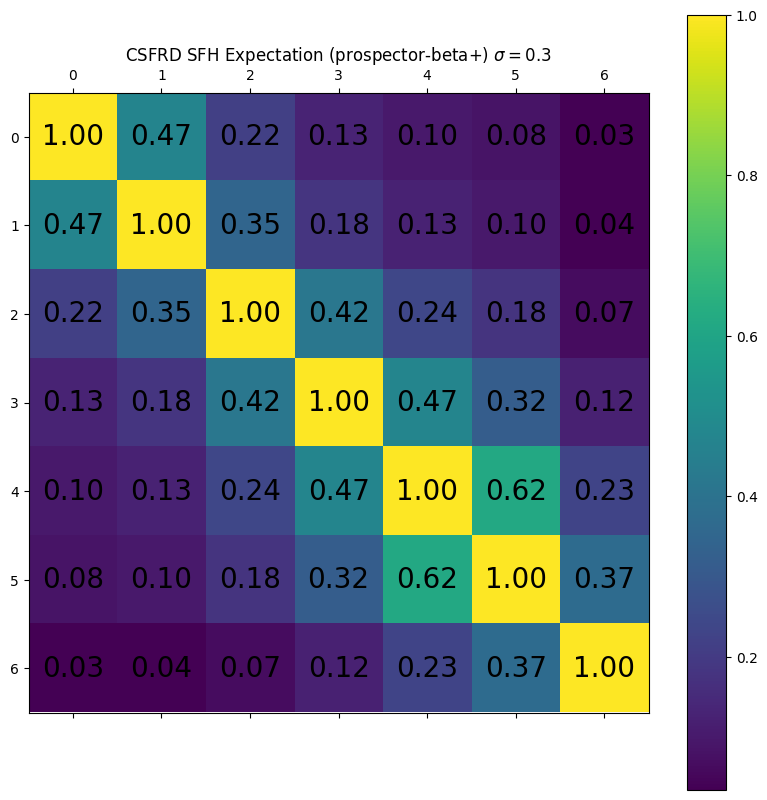

In [26]:
correlations = np.corrcoef(sfrs.T)
plot_corr(correlations, "CSFRD SFH Expectation (prospector-beta+) $\sigma=0.3$")

In [31]:
popcosmos_data = np.load("dust_data/popcosmos_parameters_rmag_lt_25.npy")
nsamples = 500000
popcosmos_logsfrs = popcosmos_data[:nsamples, 2:8]
popcosmos_logm  = popcosmos_data[:nsamples, 0]

pop_sfrs = get_sfrs_in_bins(popcosmos_logm, popcosmos_logsfrs, sfh.default_agebins())

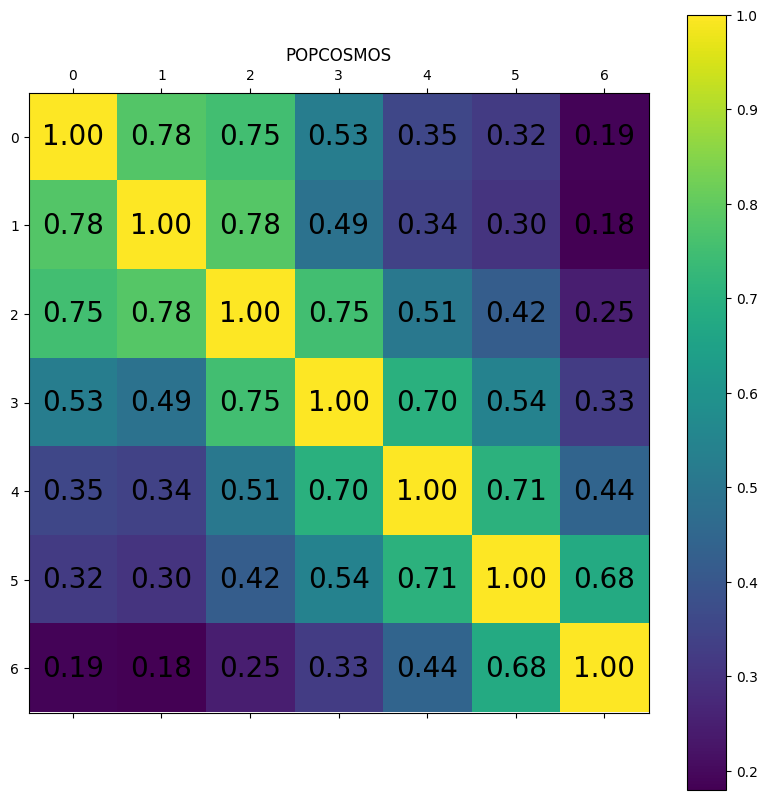

In [32]:
correlations = np.corrcoef(pop_sfrs.T)
plot_corr(correlations, "POPCOSMOS")

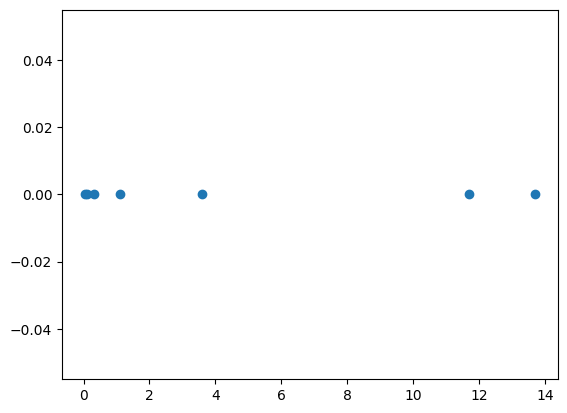

In [39]:
plt.scatter((10**sfh.default_agebins()/1e9)[:, 1], sfh.default_agebins()[:, 1]*0)